In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (12, 8)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
data=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='last')
volume=pd.read_csv('volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='m',how='last')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  from IPython.kernel.zmq import kernelapp as app


The regression is returns scaled by vol:

$$ \frac{r_t^s}{\sigma^s_{t-1}} = \alpha + \beta \frac{r_{t-h}^s}{\sigma^s_{t-h-1}} + \varepsilon_t^s $$

In [5]:
tstats=pd.DataFrame()
for mkt in data.columns:
    d=pd.Series()
    Y=data[mkt].resample(rule='m',how='last').pct_change().dropna()
    Y=(Y/pd.rolling_std(Y,12)).dropna()
    for i in range(1,20):
        X = pd.DataFrame()
        X['month']=Y.shift(i).dropna()
        X['Alpha']=1
        try:
            r= sm.OLS(Y[i:],X).fit()
        except:
            print mkt
            continue
        d['T-'+str(i)]=r.tvalues.month
    tstats[mkt]=d


Commodities Index
Commodities Index
Commodities Index
Commodities Index
Commodities Index
Commodities Index
Commodities Index
Commodities Index


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


Average tstat for monthly delays

$$\frac{1}{S} \sum_1^S tstat_i$$

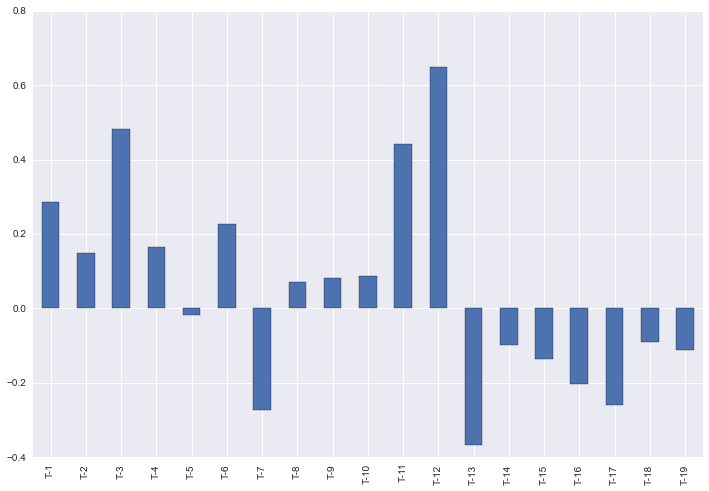

In [6]:
tstats.mean(axis=1).plot(kind='bar')

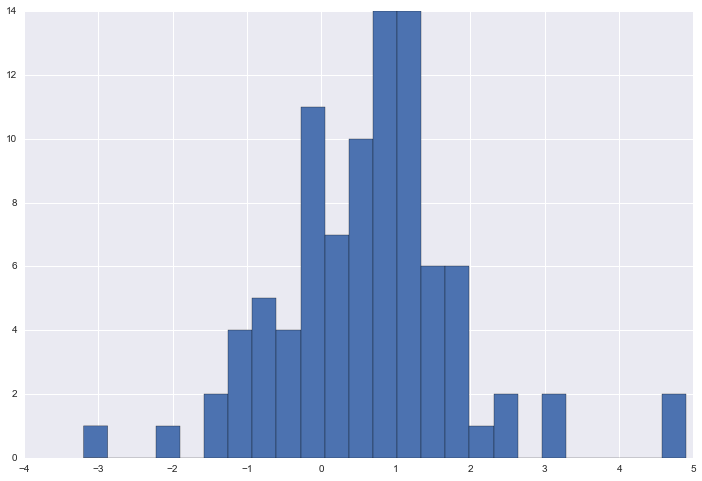

In [13]:
tstats.T['T-12'].hist(bins=25)